In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score,recall_score,precision_score,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression,ElasticNet


In [26]:
hr = pd.read_csv(r"F:/PML/Cases/human-resources-analytics/HR_comma_sep.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [27]:
hr_dum = pd.get_dummies(hr, drop_first=True)

In [28]:
X = hr_dum.drop('left', axis=1)
y = hr_dum['left']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=23,stratify=y)


In [30]:
print(y.value_counts())

left
0    11428
1     3567
Name: count, dtype: int64


In [31]:
print(y.value_counts(normalize=True)*100)

left
0    76.212071
1    23.787929
Name: proportion, dtype: float64


In [32]:
lr = LogisticRegression(penalty=None)
lr.fit(X_train,y_train)
y_pred_prob = lr.predict_proba(X_test)
print(y_pred_prob)

[[0.78325832 0.21674168]
 [0.64448158 0.35551842]
 [0.80310858 0.19689142]
 ...
 [0.98211217 0.01788783]
 [0.48858263 0.51141737]
 [0.90684335 0.09315665]]


C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
y_pred = lr.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 0]


In [46]:
'''actual=np.array([0,
0,
0,
1,
0,
1,
1,
0,
1,
0,
0,
1])
pred=np.array([0,
0,
0,
0,
1,
1,
0,
0,
1,
1,
0,
0])'''


'actual=np.array([0,\n0,\n0,\n1,\n0,\n1,\n1,\n0,\n1,\n0,\n0,\n1])\npred=np.array([0,\n0,\n0,\n0,\n1,\n1,\n0,\n0,\n1,\n1,\n0,\n0])'

In [52]:
print(confusion_matrix(y_test,y_pred))


[[3168  261]
 [ 620  450]]


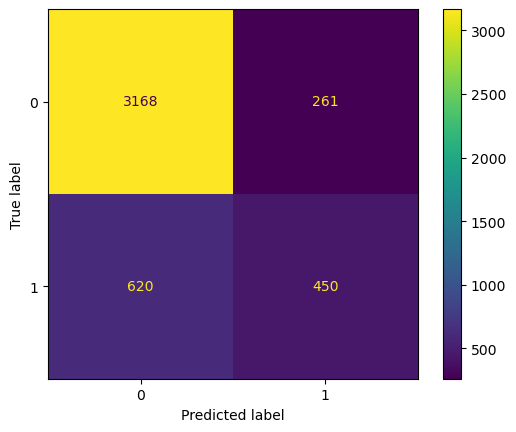

In [59]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(cm,display_labels=['0','1'])

disp.plot()
plt.show()

In [36]:
print(accuracy_score(actual,pred))

0.5833333333333334


In [37]:
print(recall_score(actual,pred,pos_label=0))

0.7142857142857143


In [38]:
print(recall_score(actual,pred,pos_label=1))

0.4


In [42]:
print(recall_score(actual,pred,average='macro'))

0.5571428571428572


In [43]:
print(precision_score(actual,pred,pos_label=0))

0.625


In [40]:
print(precision_score(actual,pred,pos_label=1))

0.5


In [45]:
print(precision_score(actual,pred,average='macro'))

0.5625


In [ ]:
print(classification_report())

#### Roc curve for None

In [60]:
from sklearn.metrics import roc_auc_score, roc_curve

In [61]:
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob = y_pred_prob[:,1]


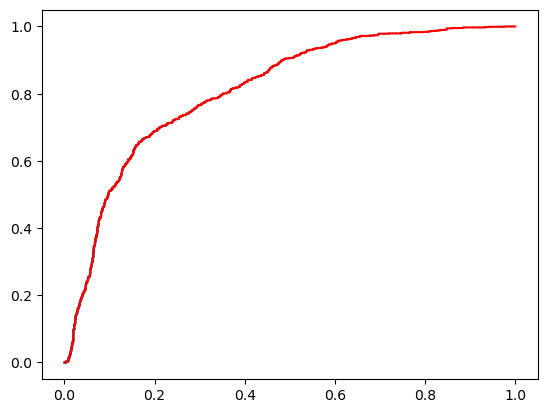

0.8121168265181805


In [66]:
fpr, tpr, thresh  = roc_curve(y_test, y_pred_prob)
plt.scatter(fpr, tpr, thresh)
plt.plot(fpr,tpr,c='red')
plt.xlabel = ("1 - Specificity")
plt.ylabel = ("Sensitivity")
plt.show()
print(roc_auc_score(y_test, y_pred_prob))

#### Roc curve for l1

In [68]:
lr = LogisticRegression(penalty='l1',solver='saga',l1_ratio=0.5)
lr.fit(X_train,y_train)
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob = y_pred_prob[:,1]




C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


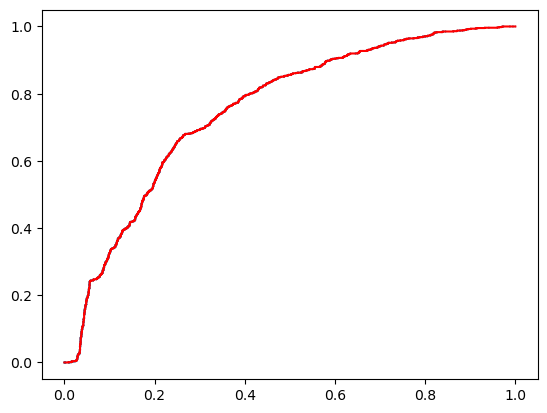

0.7525234189963015


In [69]:
fpr, tpr, thresh  = roc_curve(y_test, y_pred_prob)
plt.scatter(fpr, tpr, thresh)
plt.plot(fpr,tpr,c='red')
plt.xlabel = ("1 - Specificity")
plt.ylabel = ("Sensitivity")
plt.show()
print(roc_auc_score(y_test, y_pred_prob))

#### Roc curve for l2


In [71]:
lr = LogisticRegression(penalty='l2',solver='saga',l2_ratio=0.5)
lr.fit(X_train,y_train)
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob = y_pred_prob[:,1]





TypeError: LogisticRegression.__init__() got an unexpected keyword argument 'l2_ratio'

#### Roc using Elastic

In [83]:

elastic = ElasticNet(alpha=0.001, l1_ratio=0.5)
elastic.fit(X_train, y_train)
y_pred_prob = elastic.predict(X_test)



C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


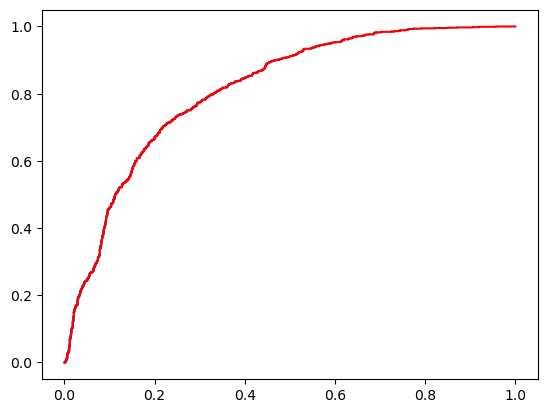

0.81207076529764


In [84]:
fpr, tpr, thresh  = roc_curve(y_test, y_pred_prob)
plt.scatter(fpr, tpr, thresh)
plt.plot(fpr,tpr,c='red')
plt.xlabel = ("1 - Specificity")
plt.ylabel = ("Sensitivity")
plt.show()
print(roc_auc_score(y_test, y_pred_prob))

#### Grid Search CV

In [85]:
from sklearn.model_selection import StratifiedKFold
params = {'penalty':[None, 'l1', 'l2', 'elasticnet']}
lr = LogisticRegression(solver='saga', l1_ratio=0.5)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state = 23)



In [86]:
gcv = GridSearchCV(lr, param_grid=params, cv=kfold)
gcv.fit(X,y)


C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.war

{'penalty': 'l1'}
0.7570523507835946


C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [87]:
#by default it gives the accuracy score.
print(gcv.best_params_)
print(gcv.best_score_)

{'penalty': 'l1'}
0.7570523507835946


In [88]:
#rock curve score(roc auc score)
gcv = GridSearchCV(lr, param_grid=params, cv=kfold, scoring='roc_auc')
gcv.fit(X,y)


C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.war

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=LogisticRegression(l1_ratio=0.5, solver='saga'),
             param_grid={'penalty': [None, 'l1', 'l2', 'elasticnet']},
             scoring='roc_auc')

In [89]:
print(gcv.best_params_)
print(gcv.best_score_)

{'penalty': 'l2'}
0.7820087731829674
